In [1]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
plt.rc('font', family='Malgun Gothic')

In [3]:
df = pd.read_excel('C:\\Users\\osh27\\Desktop\\강남구.xlsx')
df

,Unnamed: 0,gid,pop,layer,adm_dr_cd,adm_dr_nm,objectid,8_num,living_pop,floating_pop,area_sum,review_visitor,blog_visitor,avg_sal_sum,x_coord,y_coord
0,0,다사585452,21,강남구,1123064,역삼1동,366,11680640,2622.636,18.164,372.34,482,34,2220000.000,127.031022,37.505592
1,1,다사583456,440,강남구,1123052,논현1동,360,11680521,20072.545,117.325,29.70,60,2,569333.333,127.028737,37.509188
2,2,다사597458,62,강남구,1123059,삼성2동,363,11680590,1938.262,12.312,25.90,404,36,811000.000,127.044566,37.511053
3,3,다사584464,23,강남구,1123053,논현2동,361,11680531,1070.405,8.640,45.86,2,4,580000.000,127.030032,37.516449
4,4,다사579456,366,강남구,1123052,논현1동,360,11680521,16903.196,98.800,113.85,214,13,1707999.999,127.024211,37.509170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,430,다사583455,435,강남구,1123052,논현1동,360,11680521,20072.545,117.325,16.00,35,188,569333.333,127.028743,37.508287
431,431,다사602442,826,강남구,1123065,역삼2동,367,11680650,27556.467,125.979,401.31,2303,127,1758999.999,127.050310,37.496653
432,432,다사598452,351,강남구,1123064,역삼1동,366,11680640,23603.728,163.476,31.00,310,0,740000.000,127.045730,37.505650
433,433,다사606456,63,강남구,1123059,삼성2동,363,11680590,1938.262,12.312,194.35,732,61,811000.000,127.054733,37.509272


In [4]:
df1 = df.iloc[:, [14,15]]
df1

,x_coord,y_coord
0,127.031022,37.505592
1,127.028737,37.509188
2,127.044566,37.511053
3,127.030032,37.516449
4,127.024211,37.509170
...,...,...
430,127.028743,37.508287
431,127.050310,37.496653
432,127.045730,37.505650
433,127.054733,37.509272


In [5]:
# data
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# model
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift, estimate_bandwidth

# grid search
from sklearn.model_selection import GridSearchCV

# evaluation
from sklearn.metrics.cluster import silhouette_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import *

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x_coord  435 non-null    float64
 1   y_coord  435 non-null    float64
dtypes: float64(2)
memory usage: 6.9 KB


In [7]:
# from sklearn.preprocessing import StandardScaler

# standard_scaler = StandardScaler()
# scaled_df = pd.DataFrame(standard_scaler.fit_transform(df), columns=df.columns) # scaled된 데이터

# 정규화
from sklearn.preprocessing import MinMaxScaler
standard_scaler = MinMaxScaler()
scaled_df = standard_scaler.fit_transform(df1)

In [8]:
scaled_df

array([[0.13498737, 0.62387516],
       [0.11042691, 0.67394184],
       [0.2805359 , 0.69990293],
       [0.12434518, 0.77502397],
       [0.06179081, 0.67368925],
       [0.41407944, 0.61231437],
       [0.02457053, 0.82407401],
       [0.27021741, 0.71284966],
       [0.45176452, 0.55041323],
       [0.26878948, 0.61200587],
       [0.14762931, 0.52355339],
       [0.45122159, 0.60035391],
       [0.20853515, 0.49876724],
       [0.24373154, 0.81281174],
       [0.22027529, 0.5866651 ],
       [0.19500123, 0.78731016],
       [0.14696447, 0.66158167],
       [0.15978659, 0.52361568],
       [0.32998889, 0.52447193],
       [0.01318057, 0.78663584],
       [0.64657   , 0.41305057],
       [0.69508666, 0.43837031],
       [0.21938157, 0.77488546],
       [0.26826059, 0.78625674],
       [0.1101224 , 0.73668185],
       [0.22087078, 0.46118461],
       [0.18428112, 0.48609568],
       [0.37711847, 0.85096041],
       [0.15845981, 0.79967206],
       [0.26867151, 0.63710195],
       [0.

In [9]:
plt.rc('font', family='gulim')

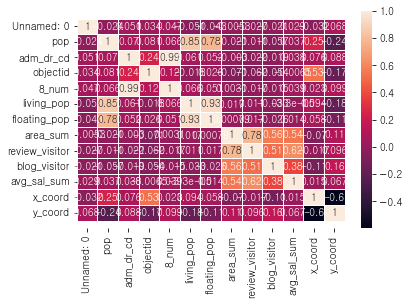

In [10]:
g = sns.heatmap(df.corr(), annot=True, linewidths=.5)
bottom, top = g.get_ylim() # heatmap plot이 잘리는 것 방지하기 위한 방법
g.set_ylim(bottom+0.5, top-0.5)
plt.show()

In [11]:
pca = PCA(n_components=2)
reduced_df = pd.DataFrame(pca.fit_transform(scaled_df))
# r_scaled_df = pd.DataFrame(standard_scaler.fit_transform(reduced_df)) 
# print(reduced_df.shape, r_scaled_df.shape)
reduced_df

,0,1
0,-0.092846,0.101675
1,-0.145620,0.083651
2,-0.043722,-0.055013
3,-0.207271,0.002347
4,-0.179825,0.118228
...,...,...
430,-0.136702,0.092479
431,0.141698,0.043051
432,0.018329,-0.010680
433,0.051055,-0.114759


In [12]:
plt.figure(figsize=(15,8))
linkage_array = ward(reduced_df)
dendrogram(linkage_array)
plt.xlabel("Sample Num")
plt.ylabel("Cluster Dist")

# 클러스터를 구분하는 커트라인을 표시
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [350, 350], '--', c='k')
ax.plot(bounds, [200, 200], '--', c='k')
ax.plot(bounds, [100, 100], '--', c='k')
ax.text(bounds[1], 700, ' 3 Clusters ', va='center', fontdict={'size': 10})
ax.text(bounds[1], 690, ' 4 Clusters ', va='center', fontdict={'size': 10})
ax.text(bounds[1], 680, ' 5 Clusters ', va='center', fontdict={'size': 10})
ax.text(bounds[1], 670, ' 6 Clusters ', va='center', fontdict={'size': 10})
ax.text(bounds[1], 660, ' 7 Clusters ', va='center', fontdict={'size': 10})
ax.text(bounds[1], 650, ' 8 Clusters ', va='center', fontdict={'size': 10})
ax.text(bounds[1], 640, ' 9 Clusters ', va='center', fontdict={'size': 10})
ax.text(bounds[1], 630, ' 10 Clusters ', va='center', fontdict={'size': 10})
ax.text(bounds[1], 620, ' 11 Clusters ', va='center', fontdict={'size': 10})
ax.text(bounds[1], 610, ' 12 Clusters ', va='center', fontdict={'size': 10})
ax.text(bounds[1], 600, ' 13 Clusters ', va='center', fontdict={'size': 10})
ax.text(bounds[1], 590, ' 14 Clusters ', va='center', fontdict={'size': 10})
ax.text(bounds[1], 580, ' 15 Clusters ', va='center', fontdict={'size': 10})
plt.show()

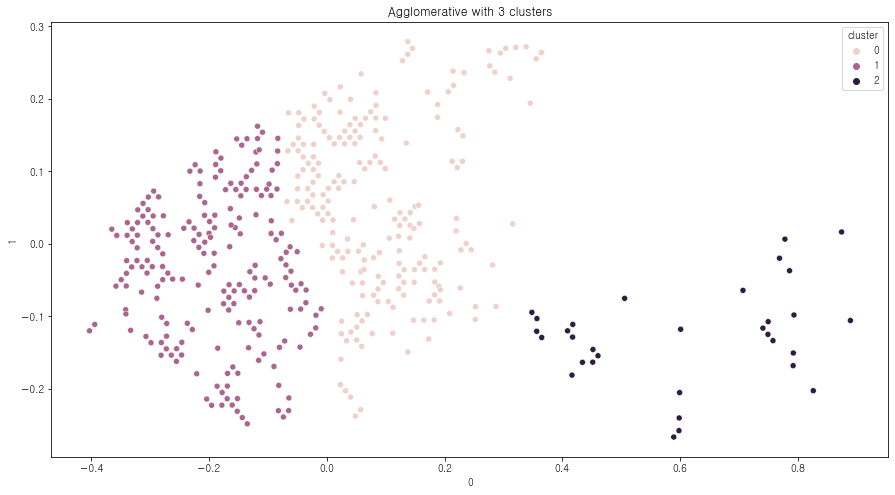

Silhouette Coefficient: 0.4275
Davies Bouldin Index: 0.8033


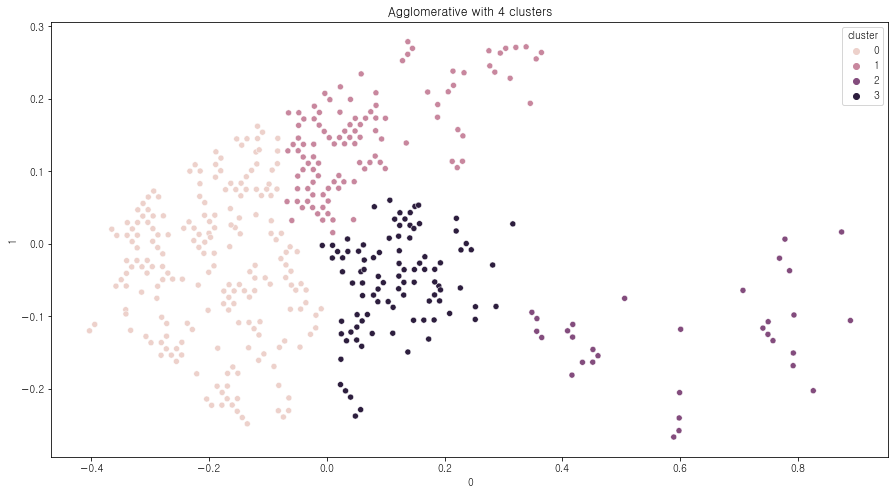

Silhouette Coefficient: 0.4022
Davies Bouldin Index: 0.8119


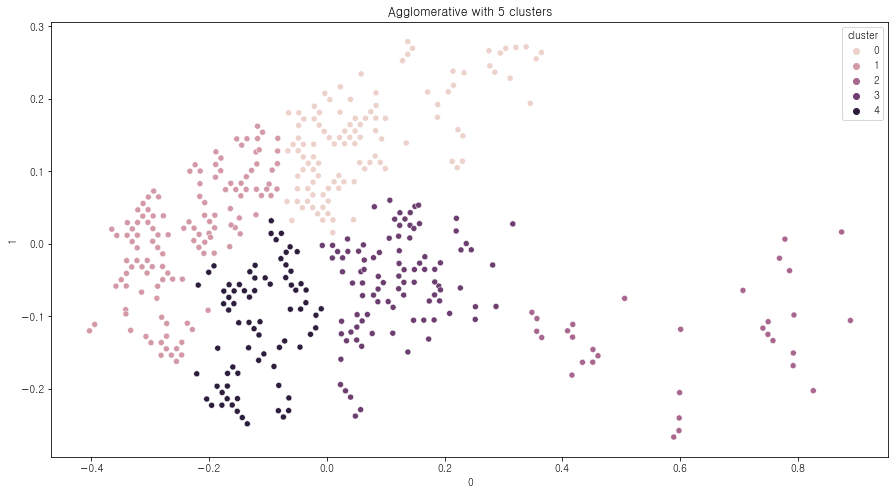

Silhouette Coefficient: 0.3613
Davies Bouldin Index: 0.9444


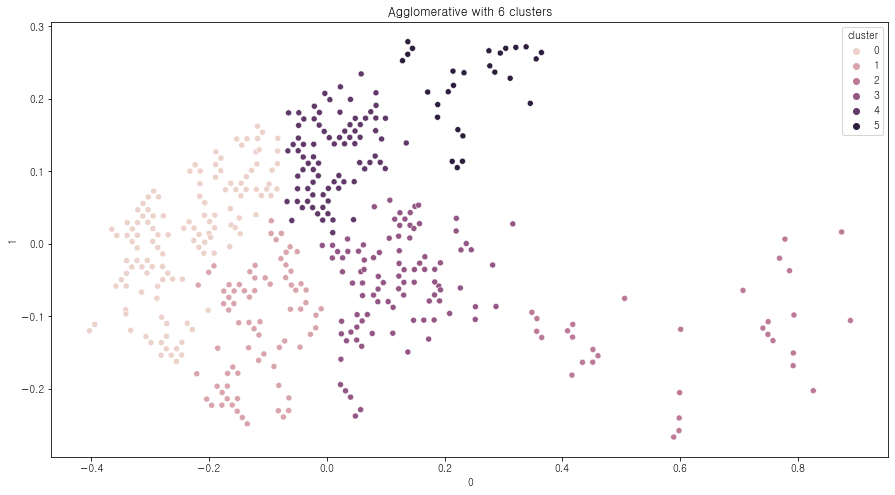

Silhouette Coefficient: 0.3800
Davies Bouldin Index: 0.8075


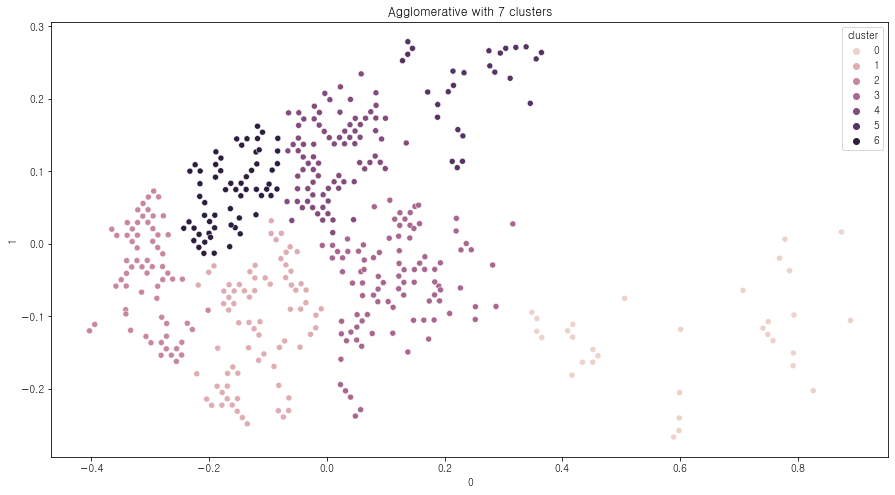

Silhouette Coefficient: 0.4080
Davies Bouldin Index: 0.7095


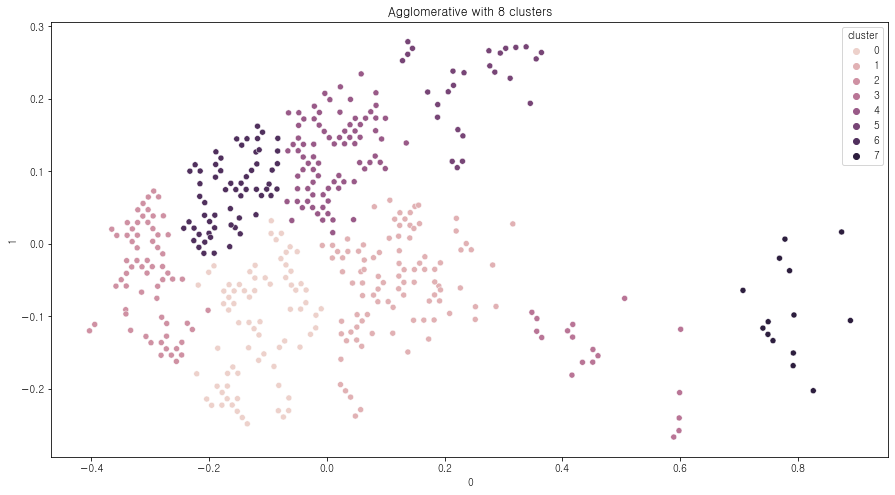

Silhouette Coefficient: 0.4154
Davies Bouldin Index: 0.6788


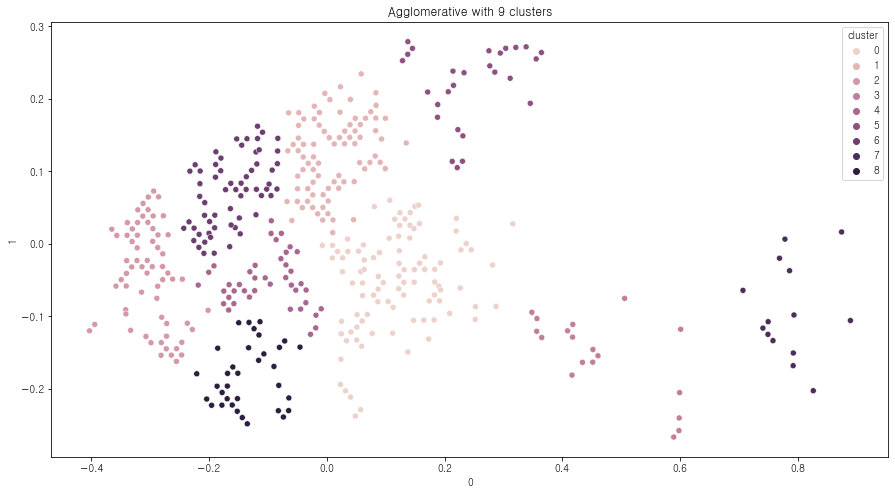

Silhouette Coefficient: 0.4116
Davies Bouldin Index: 0.7175


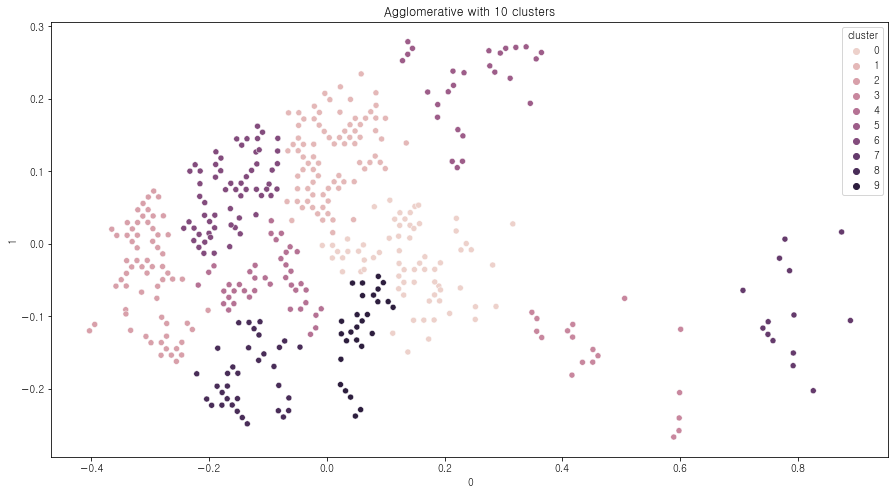

Silhouette Coefficient: 0.3902
Davies Bouldin Index: 0.7787


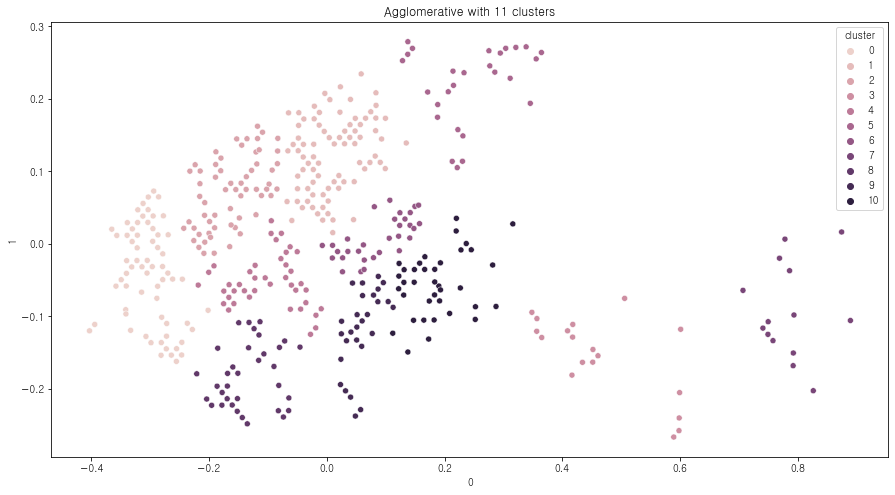

Silhouette Coefficient: 0.3871
Davies Bouldin Index: 0.7777


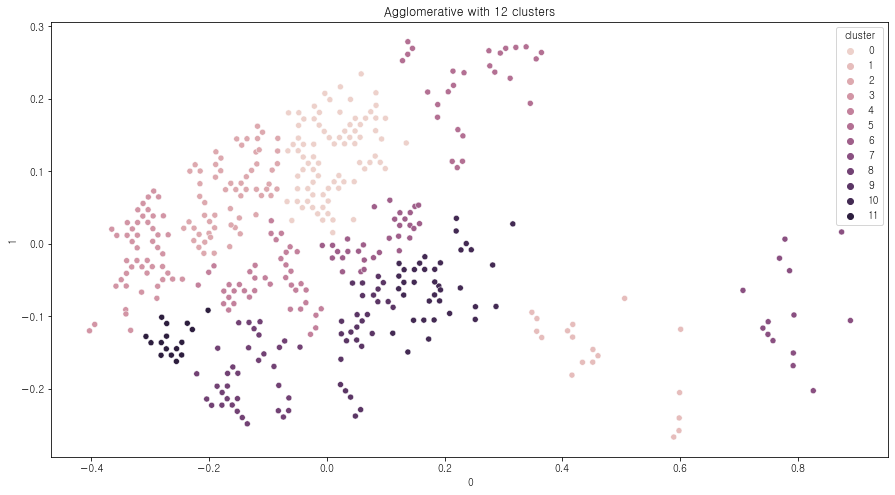

Silhouette Coefficient: 0.3804
Davies Bouldin Index: 0.7599


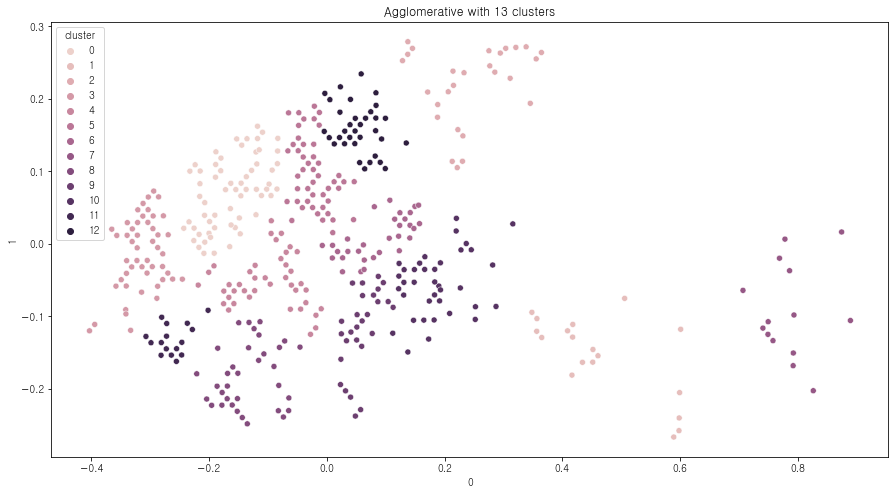

Silhouette Coefficient: 0.3675
Davies Bouldin Index: 0.7807


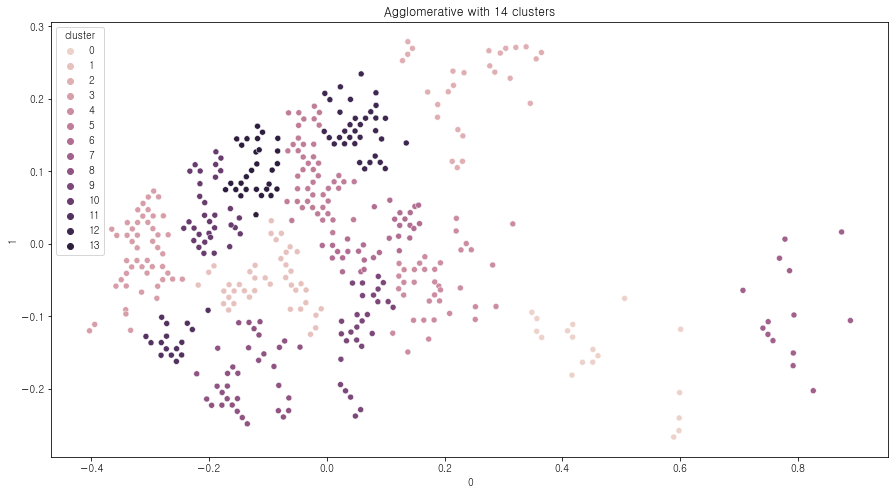

Silhouette Coefficient: 0.3632
Davies Bouldin Index: 0.7949


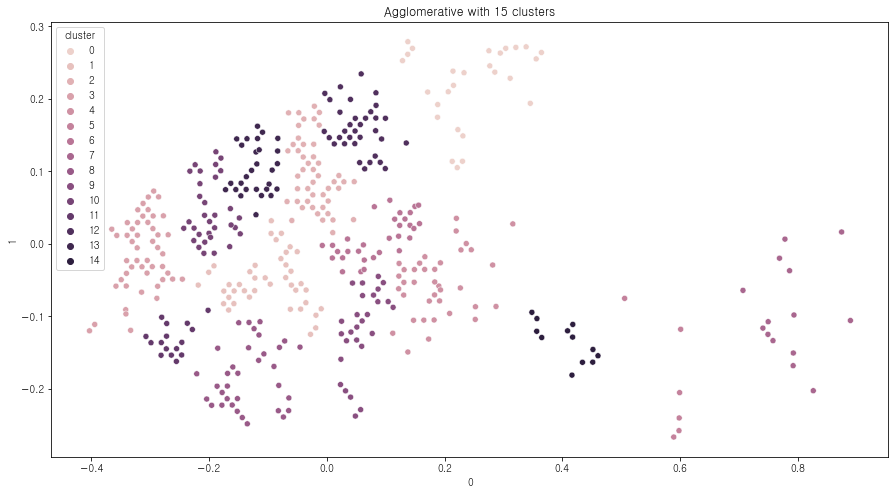

Silhouette Coefficient: 0.3633
Davies Bouldin Index: 0.8002


In [13]:
n = [3,4,5,6,7,8,9,10,11,12,13,14,15]
for i in n:
    plt.figure(figsize=(15,8))
    agg = AgglomerativeClustering(n_clusters=i)
    cluster = agg.fit(reduced_df)
    # cluster = agg.fit(r_scaled_df)
    cluster_id = pd.DataFrame(cluster.labels_)
    
    d4 = pd.DataFrame()
    d4 = pd.concat([reduced_df,cluster_id],axis=1)
    d4.columns = [0, 1, "cluster"]
    
    sns.scatterplot(d4[0], d4[1], hue = d4['cluster'], legend="full")
    plt.title('Agglomerative with {} clusters'.format(i))
    plt.show()
    
    print('Silhouette Coefficient: {:.4f}'.format(metrics.silhouette_score(d4.iloc[:,:-1], d4['cluster'])))
    print('Davies Bouldin Index: {:.4f}'.format(metrics.davies_bouldin_score(d4.iloc[:,:-1], d4['cluster'])))

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import math

In [15]:
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(clustering, X_features, cluster_lists=[1]): 
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        if clustering[0] == 'hierarchical':
            model = AgglomerativeClustering(n_clusters=n_cluster, linkage=clustering[1])
        elif clustering[0] == 'kmeans':
            model = KMeans(n_clusters=n_cluster)
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        cluster_labels = model.fit_predict(X_features)
        
        #if clustering[0] == 'dbscan':
        #    n_cluster = len(set(cluster_labels))-1
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([-1, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [16]:
params = {
    'linkage':['single', 'complete', 'average', 'ward'],
    'n_clusters':[2, 3, 4, 5, 6, 7]}

scores_hierarcical= {}
for linkage in params['linkage']:
    for n_cluster in params['n_clusters']:
        hierarchical = AgglomerativeClustering(n_clusters=n_cluster, linkage=linkage)
        hierarchical.fit(df1)
        score = silhouette_score(df1, hierarchical.labels_)
        scores_hierarcical['_'.join(['original', linkage, str(n_cluster)])] = score
        
        hierarchical = AgglomerativeClustering(n_clusters=n_cluster, linkage=linkage)
        hierarchical.fit(scaled_df)
        score = silhouette_score(scaled_df, hierarchical.labels_)
        scores_hierarcical['_'.join(['scaling', linkage, str(n_cluster)])] = score

pd.Series(scores_hierarcical).sort_values(ascending=False)[:10]

# 전반적으로 scaling을 적용한 후에 silhouette score가 낮아졌다.
# 아무래도 scaling하기 전의 척도가 군집화를 수행함에 있어 적절했던 것으로 예상된다.
# (데이터마다 scaling이 좋을수도, 나쁠수도 있다.)

original_single_2      0.652528
original_complete_2    0.637180
scaling_single_2       0.630752
original_average_2     0.628115
original_ward_2        0.613656
scaling_complete_2     0.610914
scaling_average_2      0.599886
original_single_3      0.594294
original_single_4      0.584764
original_single_5      0.583126
dtype: float64

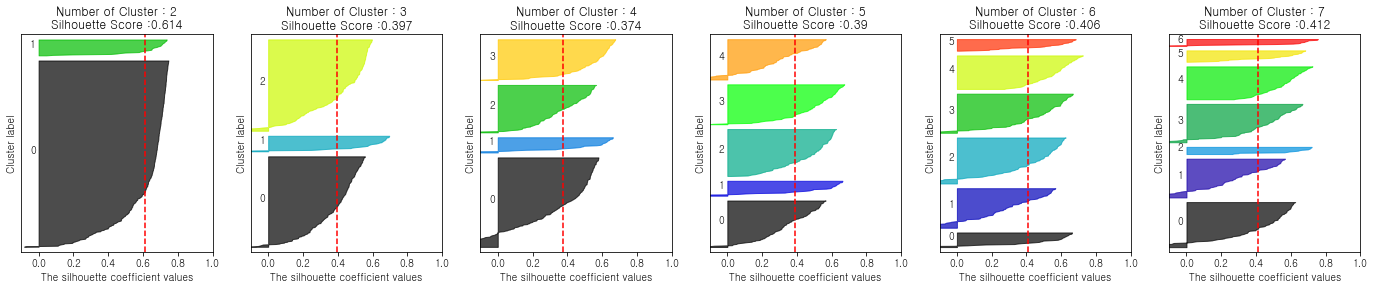

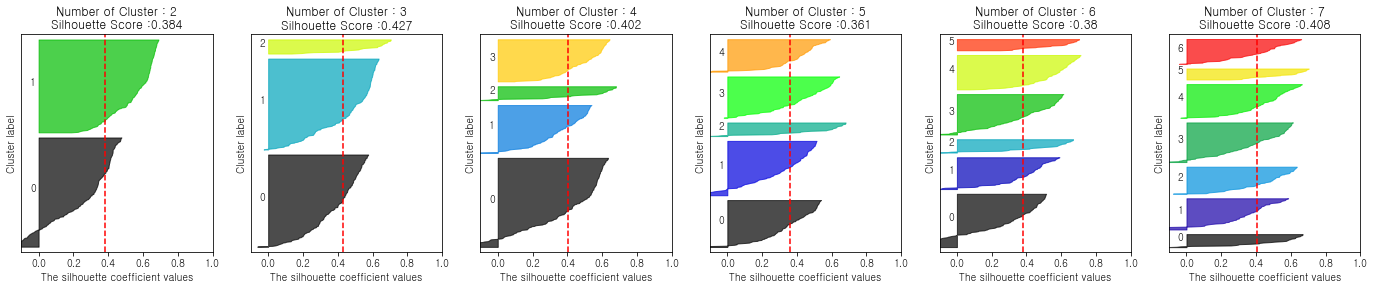

In [17]:
# 위의 결과를 바탕으로 silhouette score를 확인해보았다.
# 실루엣 지수 해석 시 silhouette score만 좋다고 해서 좋은 clustering이라고 판단하면 안된다.
# 한 cluster silhouette 지수가 좋아서 전반적인 silhouette score가 높은 것이라면 그것은 clustering이 잘 되었다고 해석하기에는 무리가 있기 때문이다.

# 아래의 그림을 보면 cluster=6일 때 silhouette score가 높지만 5일 때도 유사하게 높으며 또한 5개의 cluster로 분류된 경우 전반적으로 모든 cluster의 실루엣 지수가 높다.
# 6개보다 5개로 군집화 했을 경우 silhouette 지수가 음수인 경우가 드물어 보인다.
# 따라서 무작정 군집의 수를 6으로 설정하기 보다는 5개인 경우와 6개인 경우를 모두 시각화해보고 적절해보이는 결과를 채택하는 것이 옳아 보인다.

visualize_silhouette(['hierarchical', 'ward'], df1, [2, 3, 4, 5, 6, 7]) # 위가 original data
visualize_silhouette(['hierarchical', 'ward'], scaled_df, [2, 3, 4, 5, 6, 7]) # 아래가 scaled data


In [18]:
df

,Unnamed: 0,gid,pop,layer,adm_dr_cd,adm_dr_nm,objectid,8_num,living_pop,floating_pop,area_sum,review_visitor,blog_visitor,avg_sal_sum,x_coord,y_coord
0,0,다사585452,21,강남구,1123064,역삼1동,366,11680640,2622.636,18.164,372.34,482,34,2220000.000,127.031022,37.505592
1,1,다사583456,440,강남구,1123052,논현1동,360,11680521,20072.545,117.325,29.70,60,2,569333.333,127.028737,37.509188
2,2,다사597458,62,강남구,1123059,삼성2동,363,11680590,1938.262,12.312,25.90,404,36,811000.000,127.044566,37.511053
3,3,다사584464,23,강남구,1123053,논현2동,361,11680531,1070.405,8.640,45.86,2,4,580000.000,127.030032,37.516449
4,4,다사579456,366,강남구,1123052,논현1동,360,11680521,16903.196,98.800,113.85,214,13,1707999.999,127.024211,37.509170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,430,다사583455,435,강남구,1123052,논현1동,360,11680521,20072.545,117.325,16.00,35,188,569333.333,127.028743,37.508287
431,431,다사602442,826,강남구,1123065,역삼2동,367,11680650,27556.467,125.979,401.31,2303,127,1758999.999,127.050310,37.496653
432,432,다사598452,351,강남구,1123064,역삼1동,366,11680640,23603.728,163.476,31.00,310,0,740000.000,127.045730,37.505650
433,433,다사606456,63,강남구,1123059,삼성2동,363,11680590,1938.262,12.312,194.35,732,61,811000.000,127.054733,37.509272


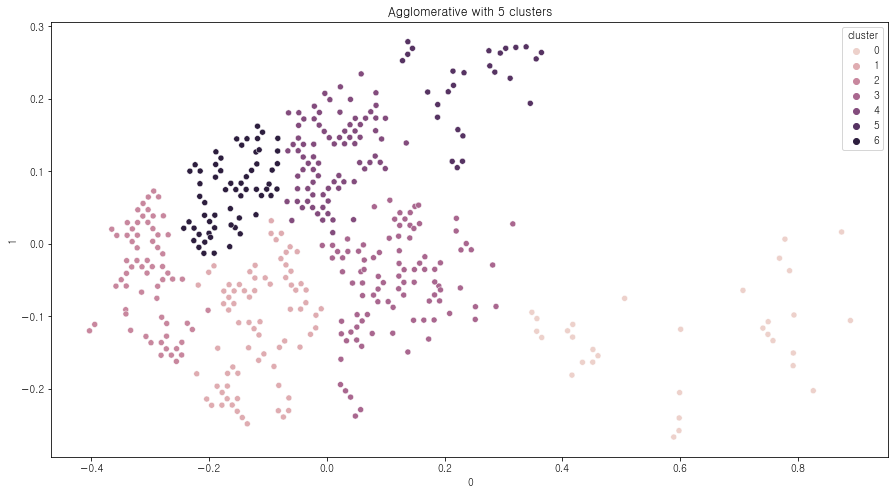

Silhouette Coefficient: 0.4080
Davies Bouldin Index: 0.7095


In [19]:
# n = [2,3,5,7,9]
# for i in n:
plt.figure(figsize=(15,8))
agg = AgglomerativeClustering(n_clusters=7)
cluster = agg.fit(reduced_df)
cluster_id = pd.DataFrame(cluster.labels_)

d4 = pd.DataFrame()
d4 = pd.concat([reduced_df,cluster_id],axis=1)
d4.columns = [0, 1, "cluster"]

sns.scatterplot(d4[0], d4[1], hue = d4['cluster'], legend="full")
plt.title('Agglomerative with {} clusters'.format(5))
plt.show()

print('Silhouette Coefficient: {:.4f}'.format(metrics.silhouette_score(d4.iloc[:,:-1], d4['cluster'])))
print('Davies Bouldin Index: {:.4f}'.format(metrics.davies_bouldin_score(d4.iloc[:,:-1], d4['cluster'])))